In [30]:
%matplotlib notebook

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [32]:
artistdf = pd.read_csv("input/Artistfile.csv")
artistdf.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16469825.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8704254.0,"album rock,british invasion,classic rock,rock",album rock
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,80.0,4238940.0,"album rock,classic rock,country rock,folk,folk...",album rock
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,83.0,5546053.0,"album rock,art rock,classic rock,dance rock,gl...",album rock
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9087546.0,"album rock,classic rock,hard rock,rock",album rock


In [33]:
trackdf = pd.read_csv("input/Trackfile.csv")
trackdf.head()

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,79,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207


In [34]:
# Adding a column of just the release year
dates = trackdf["Release Date"]
trackdf["Release Year"] = dates.apply(lambda x: int(x.split("-",1)[0]))
trackdf.head()


,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Release Year
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171,1969
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,79,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007,1969
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462,1970
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529,1965
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207,2000


In [35]:
plt.style.use("bmh")
sns.set(style="darkgrid")

<IPython.core.display.Javascript object>


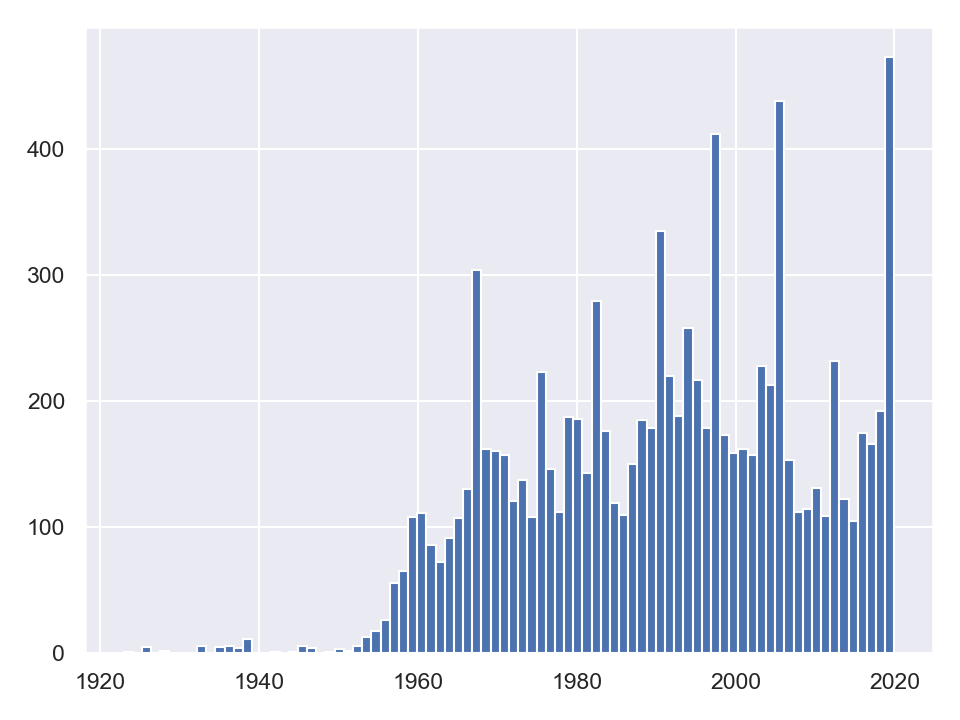

In [36]:

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.hist(trackdf["Release Year"], bins=len(trackdf["Release Year"].unique()))
plt.show()


<IPython.core.display.Javascript object>


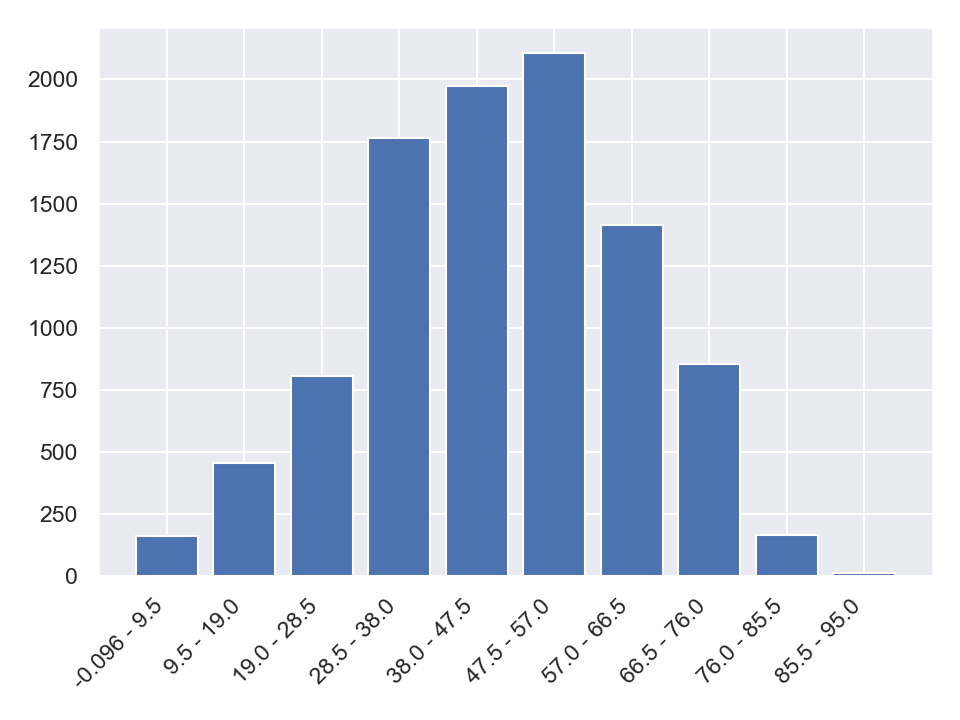

In [37]:
#popcats = pd.qcut(trackdf["Popularity"], 4)
popbins = trackdf["Popularity"].value_counts(bins=10, ascending=True, sort=False)
popb_names = [f"{x.left} - {x.right}" for x in popbins.index]
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.bar(popb_names, popbins)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")


plt.show()

In [38]:
releasedf = trackdf.loc[trackdf["Release Year"] > 1949]
releasedf = releasedf.groupby("Release Year").mean()
releasedf = releasedf.rolling(5).mean().dropna()
releasedf.head()

,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Release Year,,,,,,,,,,,,,
1955,212718.421368,39.794872,0.564365,0.373557,5.611966,-12.022490,0.782906,0.059349,0.739140,0.168862,0.165519,0.570630,114.412975
1956,218360.249573,42.107692,0.538860,0.359414,5.604274,-13.108354,0.713675,0.066974,0.733286,0.190277,0.163314,0.517038,105.345309
1957,229915.049573,41.711264,0.532871,0.400253,5.014988,-12.957229,0.649389,0.074746,0.725176,0.149052,0.172920,0.574759,107.912962
1958,235192.844444,43.349725,0.540827,0.356928,4.946270,-13.241880,0.651441,0.072160,0.738331,0.133725,0.158678,0.540502,115.706653
1959,220019.680484,43.660409,0.553888,0.371653,4.954674,-12.905536,0.670387,0.074491,0.722563,0.113200,0.166253,0.550416,115.046630


<IPython.core.display.Javascript object>


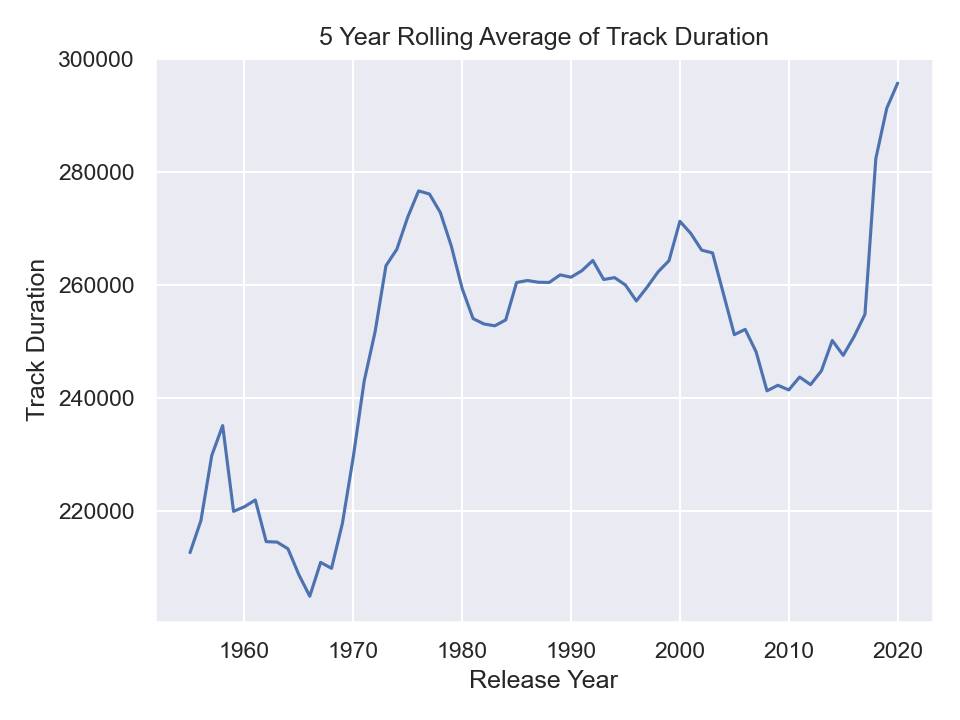

In [39]:
def ryear_sea(cols):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    sns.lineplot(data=releasedf[cols])
    ax.set_title(f"5 Year Rolling Average of {cols}")
    ax.set_ylabel(cols)
    ax.set_xlabel("Release Year")
    
ryear_sea("Track Duration")

In [40]:
# def releaseyear_line(col):
#     fig, ax = plt.subplots(1, 1, tight_layout=True)
#     ax.plot(trackdf.groupby("Release Year")[col].mean().index, trackdf.groupby("Release Year")[col].mean())
#     ax.set_title(f"Average {col} Over Time")
#     ax.set_ylabel(col)
#     ax.set_xlabel("Release Year")




In [41]:
#releaseyear_line("Track Duration")

In [42]:
trackdf.loc[trackdf["Release Year"] == 2000].corr()["Popularity"]

Track Duration     -0.087460
Popularity          1.000000
Danceability        0.326858
Energy              0.132544
Key                 0.064896
Loudness            0.368106
Mode               -0.116870
Speechiness         0.053357
Acousticness       -0.219767
Instrumentalness   -0.337967
Liveness            0.034274
Valence             0.105738
Tempo               0.048190
Release Year             NaN
Name: Popularity, dtype: float64

In [43]:

years = np.arange(1950, 2021, 1)
dur = []
dance = []
energy = []
loud = []
mode = []
speech = []
acoust = []
instrum = []
liven = []
vale = []
tempo = []

for year in years:
    corr_data = trackdf.loc[trackdf["Release Year"] == year].corr()["Popularity"]
    dur.append(corr_data[0])
    dance.append(corr_data[2])
    energy.append(corr_data[3])
    loud.append(corr_data[5])
    mode.append(corr_data[6])
    speech.append(corr_data[7])
    acoust.append(corr_data[8])
    instrum.append(corr_data[9])
    liven.append(corr_data[9])
    vale.append(corr_data[10])
    tempo.append(corr_data[11])
corr_df = pd.DataFrame({"Track Duration": dur,
                       "Danceability": dance,
                       "Energy": energy,
                       "Loudiness": loud,
                       "Mode": mode,
                       "Speechiness": speech,
                       "Acousticness": acoust,
                       "Instrumentalness": instrum,
                       "Liveness": liven,
                       "Valence": vale,
                       "Tempo": tempo},
                      index=years) 
corr_df = corr_df.rolling(5).mean()
corr_df = corr_df.dropna()
corr_df.head()


,Track Duration,Danceability,Energy,Loudiness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
1958,-0.177719,-0.133638,-0.086582,0.104892,0.048811,-0.055051,0.147644,-0.285919,-0.285919,0.007569,-0.201021
1959,-0.042857,-0.052658,-0.089939,-0.007952,-0.027343,-0.083179,0.123280,-0.169936,-0.169936,0.055626,-0.123028
1960,-0.099159,-0.075338,-0.076351,0.036420,-0.122582,-0.089053,0.101388,-0.204533,-0.204533,0.045449,-0.093637
1961,-0.102438,-0.040305,0.005992,0.078441,-0.042028,-0.050216,0.087454,-0.166970,-0.166970,0.068721,-0.007319
1962,-0.064721,0.003550,-0.033915,-0.003985,-0.011008,-0.094064,0.087495,-0.097611,-0.097611,0.016837,-0.026808


<IPython.core.display.Javascript object>


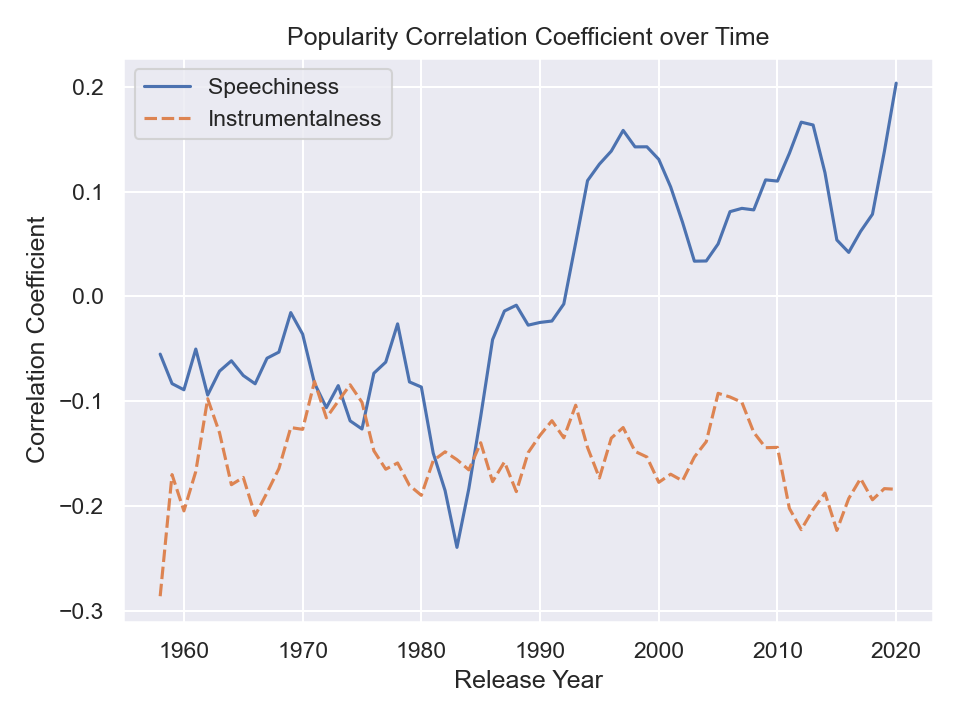

In [44]:
def correl_plot(cols):
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    sns.lineplot(data=corr_df[cols])
    ax.set_title("Popularity Correlation Coefficient over Time")
    ax.set_xlabel("Release Year")
    ax.set_ylabel("Correlation Coefficient")
correl_plot(["Speechiness", "Instrumentalness"])


<IPython.core.display.Javascript object>


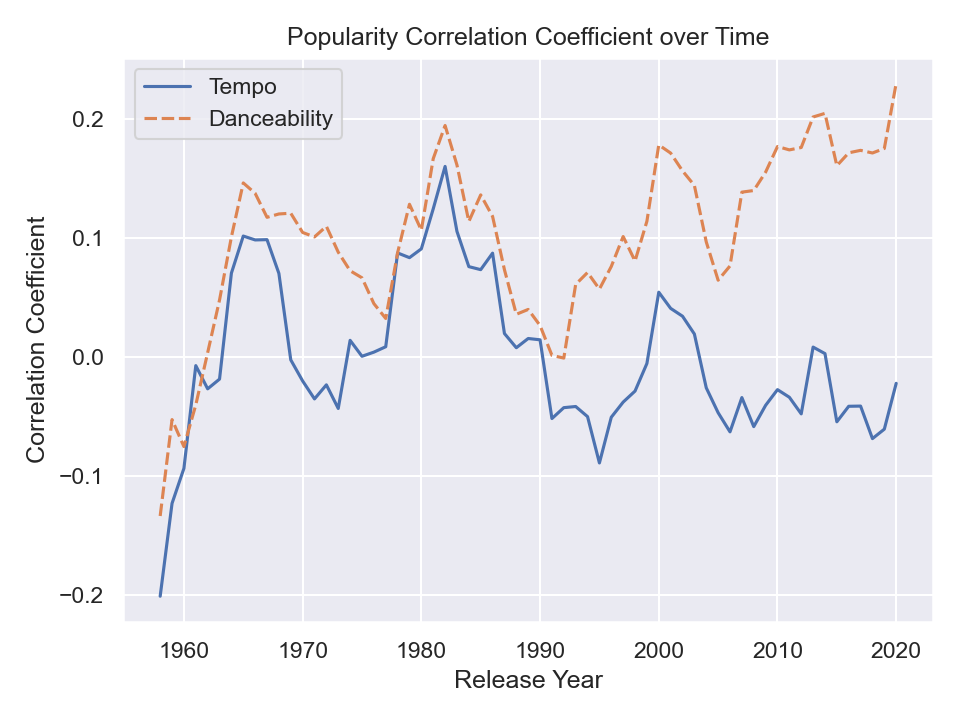

In [45]:
correl_plot(["Tempo", "Danceability"])

<IPython.core.display.Javascript object>


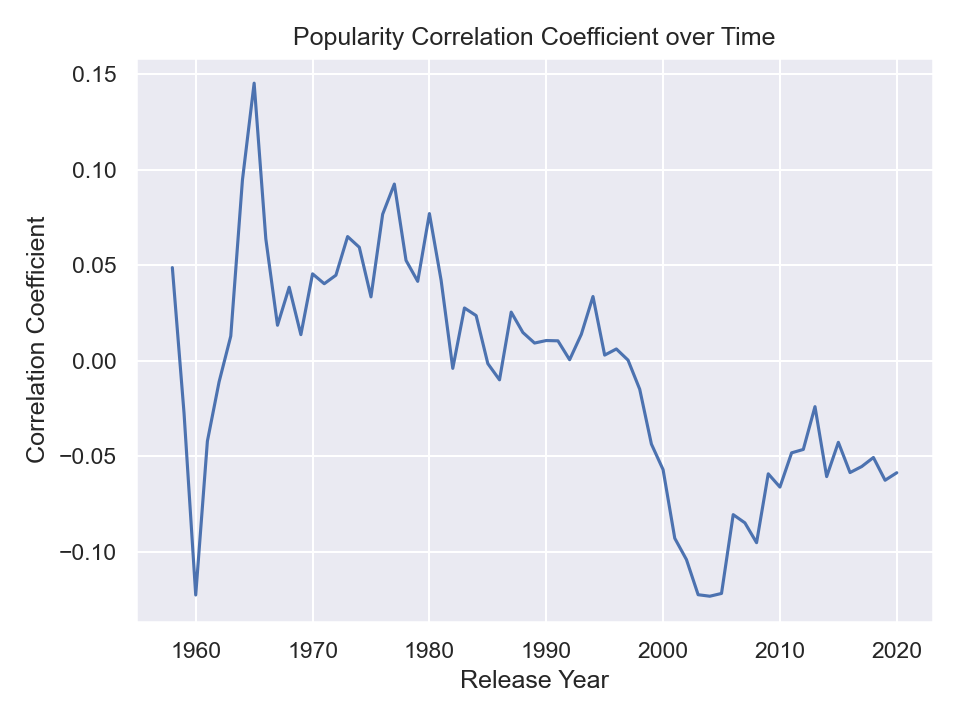

In [46]:
correl_plot("Mode")

<IPython.core.display.Javascript object>


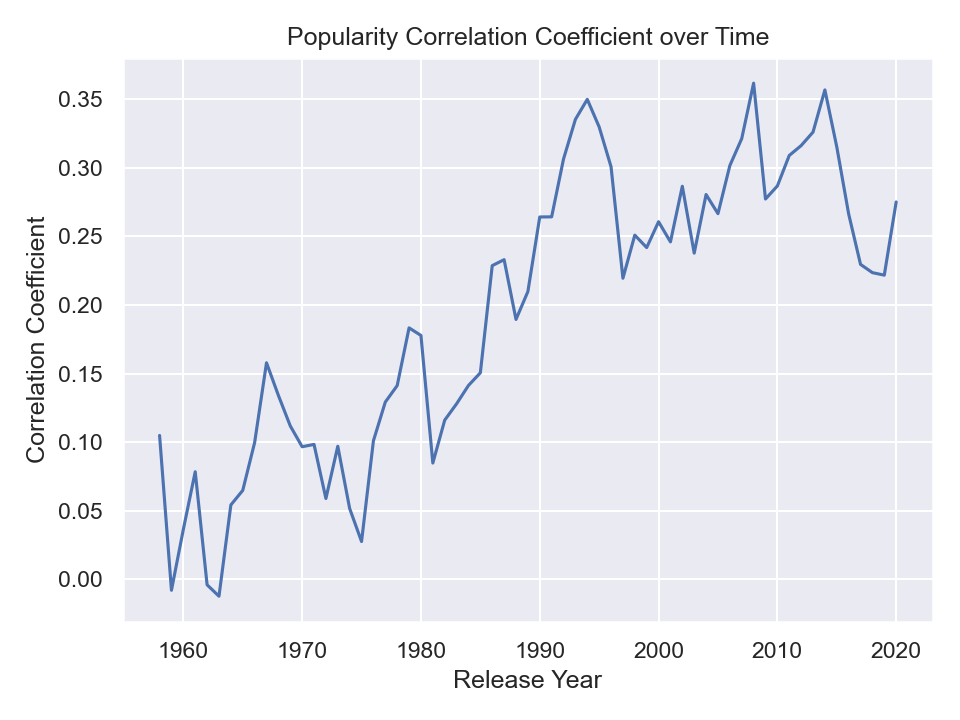

In [47]:
correl_plot("Loudiness")

<IPython.core.display.Javascript object>


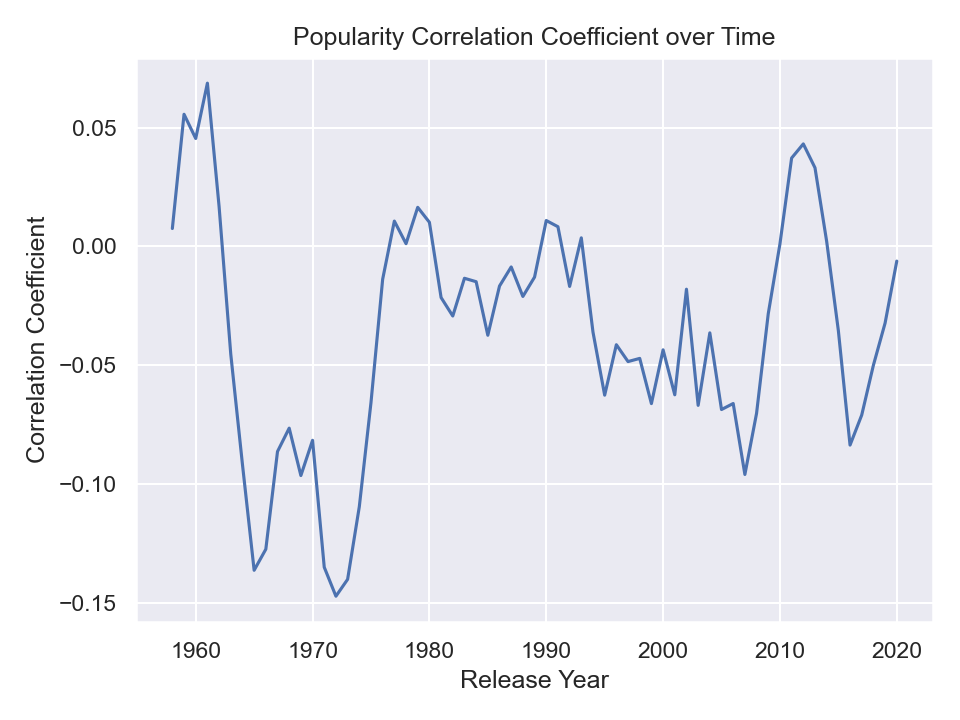

In [48]:
correl_plot("Valence")

<IPython.core.display.Javascript object>


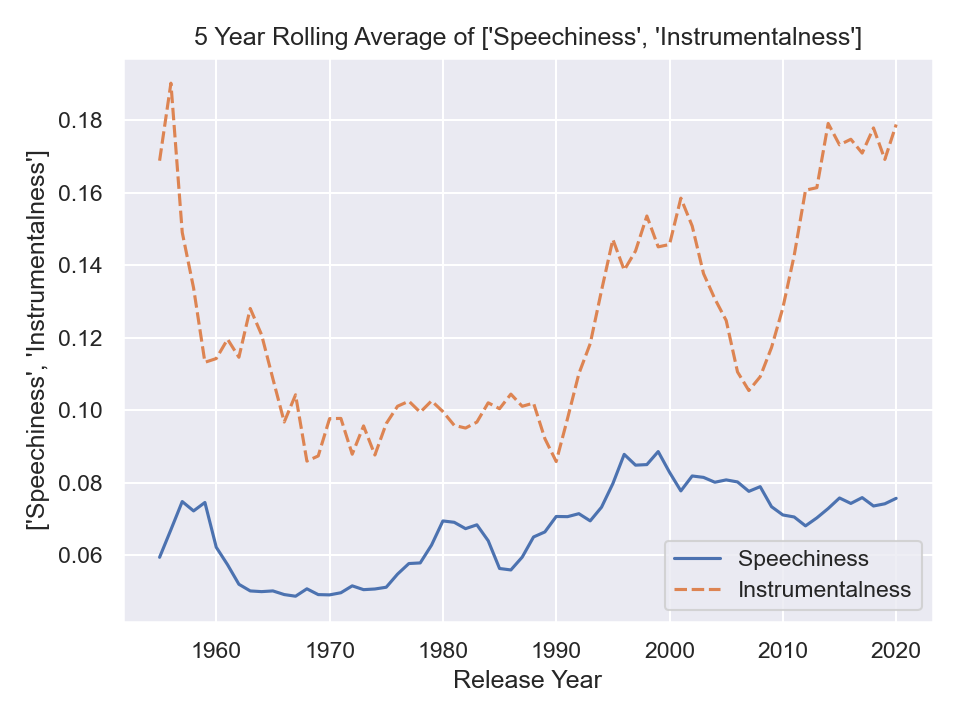

In [49]:
ryear_sea(["Speechiness", "Instrumentalness"])

<IPython.core.display.Javascript object>


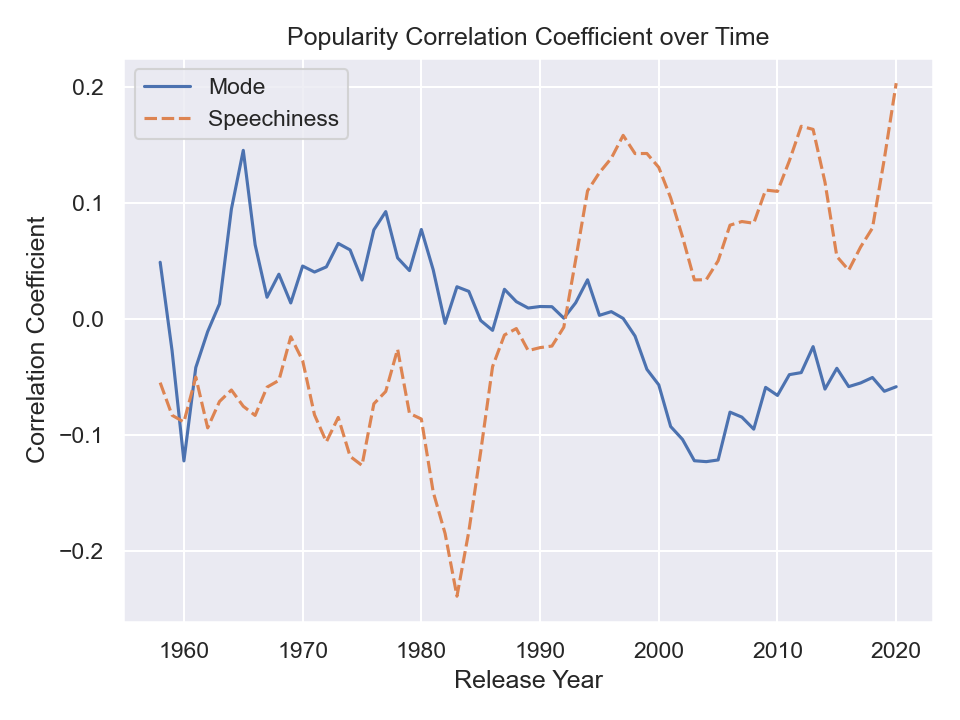

In [50]:
correl_plot(["Mode", "Speechiness"])

<IPython.core.display.Javascript object>


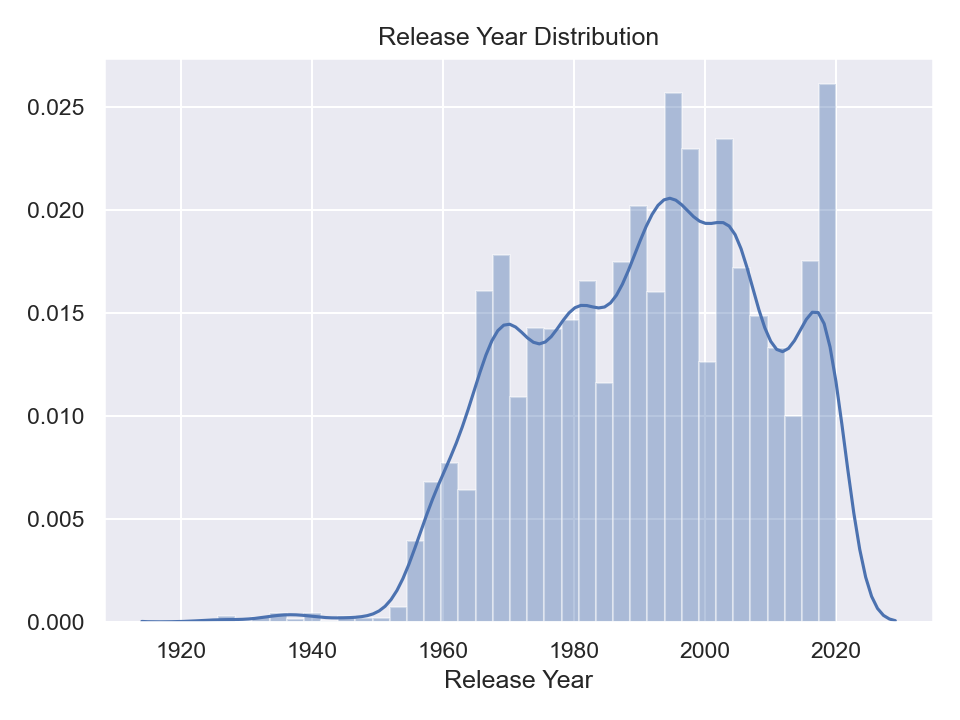

Text(0.5, 1.0, 'Release Year Distribution')

In [51]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
sns.distplot(trackdf["Release Year"])
ax.set_title("Release Year Distribution")

<IPython.core.display.Javascript object>


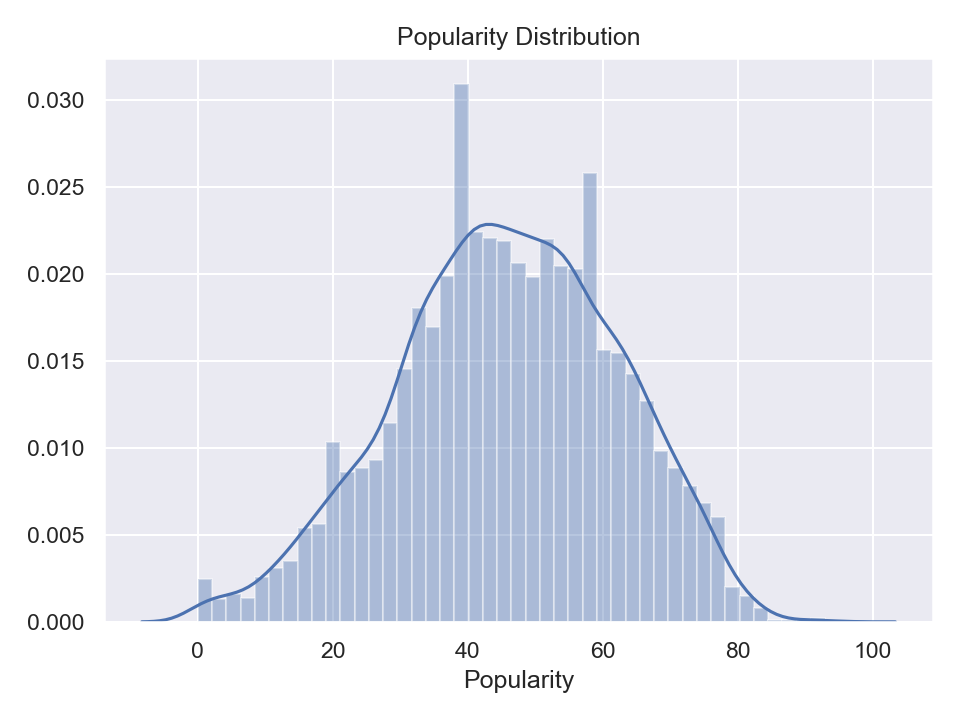

Text(0.5, 1.0, 'Popularity Distribution')

In [52]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
sns.distplot(trackdf["Popularity"])
ax.set_title("Popularity Distribution")